In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_new = (X - mean)/std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    h_theta = X.dot(theta);
    return h_theta

In [8]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    else:
        J = np.sum(((hypothesis(X, theta) - y) ** 2))/(2*m)
        return J

In [9]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    d_theta = (-2/m) * (y - hypothesis(X, theta) )
    return d_theta

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta -(1/m) * alpha * ( X.T.dot((hypothesis(X, theta) - y)))
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [11]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

In [12]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


In [13]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


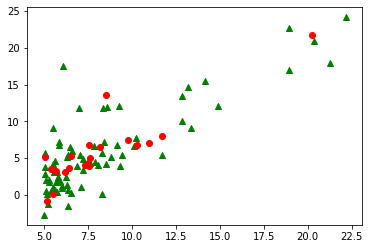

In [14]:
plot_data(X_train, X_test, y_train, y_test)

In [15]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train)
theta = np.array([0, 0])

In [16]:
y = y_train[:]

In [17]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
32.99221153839155


In [18]:
alpha = 0.02
num_iters = 1500

In [20]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: -3.8676551806119535; Theta 1: 1.1867158031133875


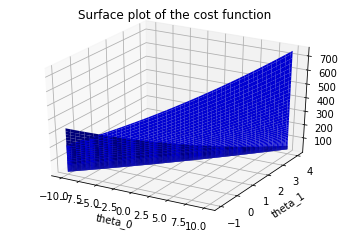

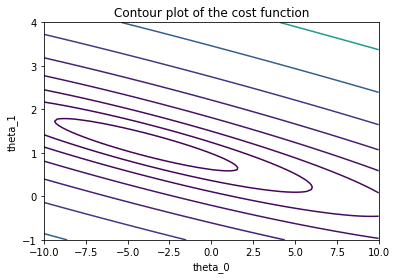

In [21]:
plot_J(X, y)

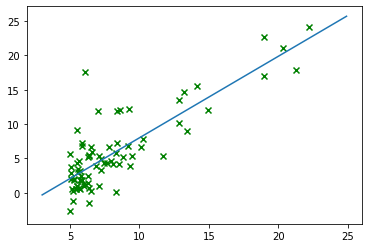

In [22]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [23]:
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) *100
diff = np.abs(y_test - y_test_pred)
res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred       err
48  11.7000   8.00430  10.016920  2.012620
46   5.0702   5.13370   2.149231  2.984469
71   7.3345   4.02590   4.836312  0.810412
83   9.7687   7.54350   7.725015  0.181515
18   6.4296   3.65180   3.762453  0.110653
20   6.1891   3.13860   3.477048  0.338448
50   7.5402   6.75040   5.080419  1.669981
53   7.6031   4.99810   5.155064  0.156964
78  10.2740   6.75260   8.324663  1.572063
52   7.4239   4.28850   4.942404  0.653904
21  20.2700  21.76700  20.187074  1.579926
10   5.7107   3.25220   2.909323  0.342877
84   6.5159   5.34360   3.864866  1.478734
76   7.5386   3.88450   5.078521  1.194021
61   5.1793  -0.74279   2.278702  3.021492
15   5.3794   3.51290   2.516164  0.996736
2    8.5186  13.66200   6.241502  7.420498
34   8.2111   6.54260   5.876587  0.666013
27  10.9570   7.04670   9.135190  2.088490
88   5.5204   0.15200   2.683491  2.531491
2.552830193378396
